In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/sintetic_data.csv")
df.head()

,id_interaccion,emisor,receptor,comentario,etiquetas,tipo_interaccion,timestamp
0,1,Usuario_6,Usuario_10,Me parece dudoso,"Mundo, Deportes",compartir,2025-01-21 01:21:58
1,2,Usuario_2,Usuario_3,Me parece dudoso,Política,compartir,2025-01-20 08:03:35
2,3,Usuario_1,Usuario_7,¿Alguien más lo vio?,Política,respuesta,2025-01-28 17:21:42
3,4,Usuario_6,Usuario_8,¿Alguien más lo vio?,"Política, Tecnología",retweet,2025-01-29 08:39:51
4,5,Usuario_9,Usuario_2,Información errónea,Política,compartir,2025-02-04 03:43:20


In [4]:
G = nx.DiGraph()

for idx, fila in df.iterrows():
    emisor = fila['emisor']
    receptor = fila['receptor']
    tipo_interaccion = fila['tipo_interaccion']
    
    G.add_node(emisor)
    G.add_node(receptor)
    
    if G.has_edge(emisor, receptor):
        G[emisor][receptor]['count'] += 1
        G[emisor][receptor]['tipos'].append(tipo_interaccion)
    else:
        G.add_edge(emisor, receptor, count=1, tipos=[tipo_interaccion])

In [13]:
data ={'Número de usuarios (nodos):': G.number_of_nodes(),
       'Número de interacciones (aristas):': G.number_of_edges()}

df_info = pd.DataFrame(data, index=['Valor']).T

In [14]:
df_info

,Valor
Número de usuarios (nodos):,10
Número de interacciones (aristas):,61


In [ ]:
print("Número de interacciones (aristas):", G.number_of_edges())

for node in G.nodes():
    print(f"{node} -> In: {G.in_degree(node)} , Out: {G.out_degree(node)}")

in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
print("Usuarios con mayor interacción recibida:", in_degrees[:5])

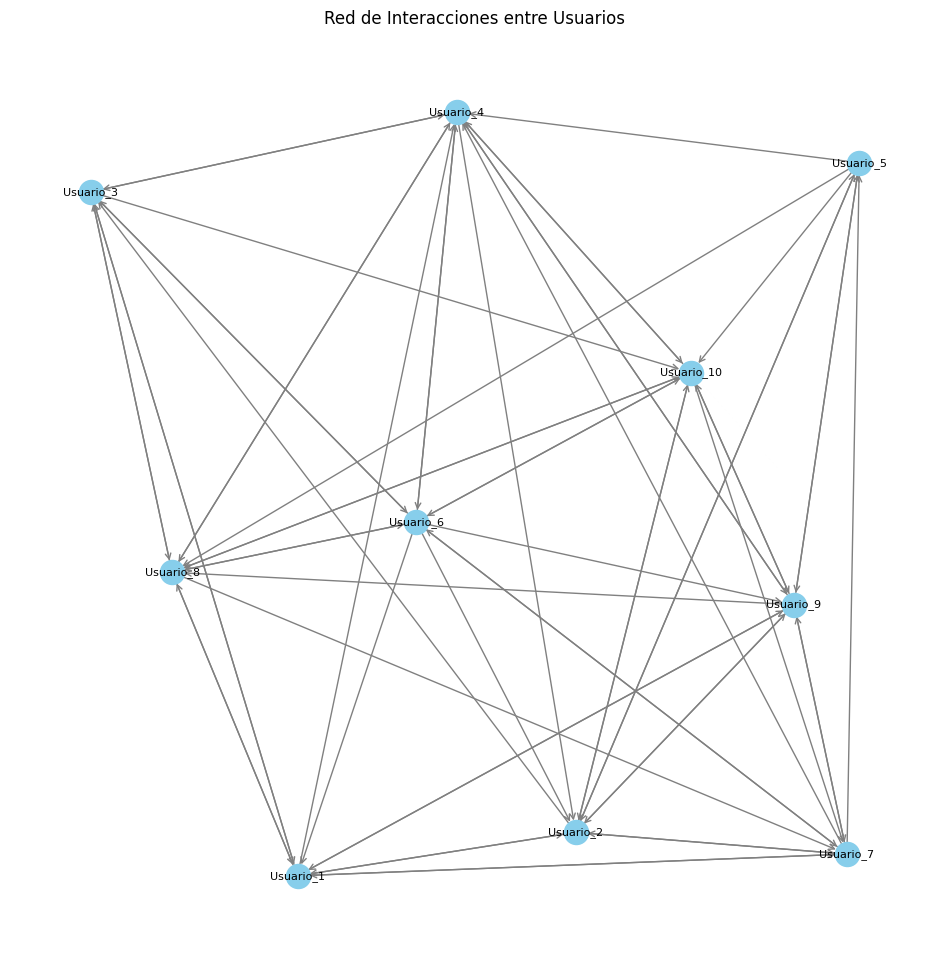

In [7]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Red de Interacciones entre Usuarios")
plt.axis("off")
plt.show()